<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Libraries Importing</h2>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import os
for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Data Loading</h2>

In [2]:
X_train=pd.read_csv('splitted_data/X_train.csv')
X_test=pd.read_csv('splitted_data/X_test.csv')
y_train=pd.read_csv('splitted_data/y_train.csv')
y_test=pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20000, 41) (5000, 41) (20000, 1) (5000, 1)


In [3]:
X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.347826,0.1,7.865866e-05,0.000021,0.0,0.0,0.0,0.066667,0.0,1.0,0.000959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005871,0.005871,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.200787,0.200787,1.00,0.00,0.02,0.00,0.02,0.02,0.02,0.02
1,0.0,0.0,0.710145,0.4,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,1.0,1.0,1.00,0.00,0.0,0.897638,0.000000,0.00,0.57,0.57,0.00,0.00,0.00,0.57,1.00
2,0.0,1.0,0.202899,0.1,1.153776e-08,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.041096,0.0,0.0,0.0,0.0,1.00,0.00,1.0,0.003937,0.086614,1.00,0.00,1.00,0.52,0.00,0.00,0.00,0.00
3,0.0,0.5,0.710145,0.1,3.100772e-07,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.086614,0.086614,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.0,0.0,0.478261,0.3,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.508806,0.003914,1.0,1.0,0.0,0.0,0.01,0.07,0.0,1.000000,0.003937,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00


In [4]:
y_train.head()

,xAttack
0,1
1,3
2,3
3,3
4,1


In [5]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.0,0.275362,0.1,4.817014e-07,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.015748,0.153543,1.00,0.00,1.00,0.15,0.00,0.0,0.00,0.0
1,0.000000,0.0,0.710145,0.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.996086,0.001957,0.04,0.0,0.95,1.0,0.00,1.00,0.0,1.000000,0.000000,0.00,1.00,0.00,0.00,0.03,0.0,0.95,1.0
2,0.006759,0.0,0.869565,0.1,5.985212e-07,0.000176,0.0,0.0,0.0,0.1,0.0,1.0,0.003835,0.0,0.0,0.003828,0.190476,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,0.00,0.0,1.00,0.00,0.0,0.000000,0.000000,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.0
3,0.000186,0.0,0.710145,0.4,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.001957,0.001957,0.00,0.0,1.00,1.0,1.00,0.00,0.0,0.645669,0.000000,0.01,0.71,0.71,0.00,0.04,0.0,0.62,1.0
4,0.000000,0.0,0.826087,0.3,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.569472,0.041096,1.00,1.0,0.00,0.0,0.07,0.05,0.0,1.000000,0.078740,0.08,0.05,0.00,0.00,1.00,1.0,0.00,0.0


In [6]:
y_test.head()

,xAttack
0,2
1,3
2,4
3,3
4,1


<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Algorithm: SupportVectorClassifier</h2>

In [7]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model=svc_model.fit(X_train.values,y_train.values.ravel())

In [8]:
svc_pred=svc_model.predict(X_test.values)
print(svc_pred)

[2 3 4 ... 0 1 4]


### Result analysis

In [9]:
class_labels=['normal', 'dos', 'r2l', 'probe', 'u2r']

<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Accuracy Score</h6>

In [10]:
model_accuracy=accuracy_score(y_true=y_test.values.ravel(),y_pred=svc_pred)
print("SupportVectorClassifier model's Validation accuracy is {:.2f}%".format(model_accuracy*100))

SupportVectorClassifier model's Validation accuracy is 95.82%


<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Classification Report</h6>

In [11]:
print(classification_report(y_true=y_test.values.ravel(),y_pred=svc_pred, target_names=class_labels))

              precision    recall  f1-score   support

      normal       0.94      0.93      0.94      1000
         dos       1.00      0.97      0.98      1000
         r2l       0.90      0.98      0.94      1000
       probe       0.99      0.99      0.99      1000
         u2r       0.97      0.93      0.95      1000

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Confusion Matrix</h6>

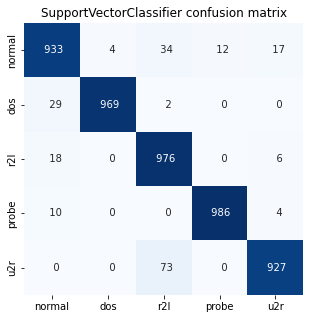

In [12]:
plt.figure(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix(y_true=y_test.values.ravel(),y_pred=svc_pred),
              annot=True,
              fmt='4d',
              cbar=False,
              cmap=plt.cm.Blues,
              xticklabels=class_labels,
              yticklabels=class_labels)
plt.title(label="SupportVectorClassifier confusion matrix")
plt.show()

<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Model Saving</h6>

In [16]:
import pickle
with open(file='models/SupportVectorClassifier_model.pkl',mode='wb') as file:
    pickle.dump(obj=svc_model,file=file)

---

In [7]:
x_train=np.reshape(a=X_train.values,newshape=(X_train.shape[0],X_train.shape[1],1))
x_test=np.reshape(a=X_test.values,newshape=(X_test.shape[0],X_test.shape[1],1))

In [8]:
print(x_train.shape,x_test.shape)

(20000, 41, 1) (5000, 41, 1)


<h2 style="font-family:san-serif;font-size:30px;color:green;font-weight:bold;text-align:right">Algorithm: ConvolutionalLong-ShortTermMemory</h2>

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D,MaxPool1D,BatchNormalization,LSTM,Flatten,Dropout,Dense
from tensorflow.keras.utils import to_categorical

In [10]:
y_train=to_categorical(y_train.values.ravel())
y_test=to_categorical(y_test.values.ravel())

In [11]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],
                                                                            x_train.shape[2])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D())
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D())
model.add(LSTM(units=200,return_sequences=True))
model.add(LSTM(units=200,return_sequences=True))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 39, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 64)            12352     
                                                                 
 batch_normalization (BatchN  (None, 37, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 18, 64)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 14, 128)           4

In [13]:
history=model.fit(x=x_train,y=y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
625/625 [==============================] - 78s 101ms/step - loss: 0.2252 - accuracy: 0.9270 - val_loss: 0.1639 - val_accuracy: 0.9436
Epoch 2/10
625/625 [==============================] - 59s 95ms/step - loss: 0.1129 - accuracy: 0.9635 - val_loss: 0.1048 - val_accuracy: 0.9628
Epoch 3/10
625/625 [==============================] - 59s 95ms/step - loss: 0.0862 - accuracy: 0.9729 - val_loss: 0.1717 - val_accuracy: 0.9286
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.0711 - accuracy: 0.9772 - val_loss: 0.1060 - val_accuracy: 0.9644
Epoch 5/10
625/625 [==============================] - 60s 96ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 0.0766 - val_accuracy: 0.9754
Epoch 6/10
625/625 [==============================] - 59s 95ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 0.0691 - val_accuracy: 0.9758
Epoch 7/10
625/625 [==============================] - 58s 94ms/step - loss: 0.0651 - accuracy: 0.9786 - val_loss: 0.0754 - val_accuracy

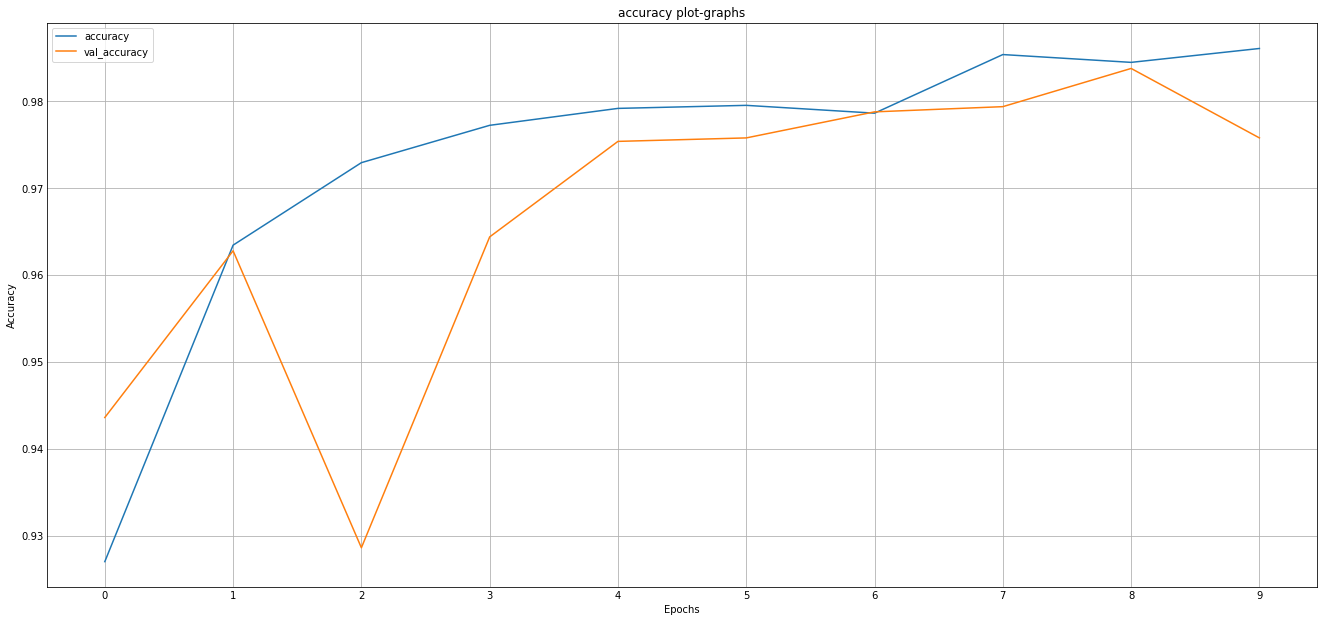

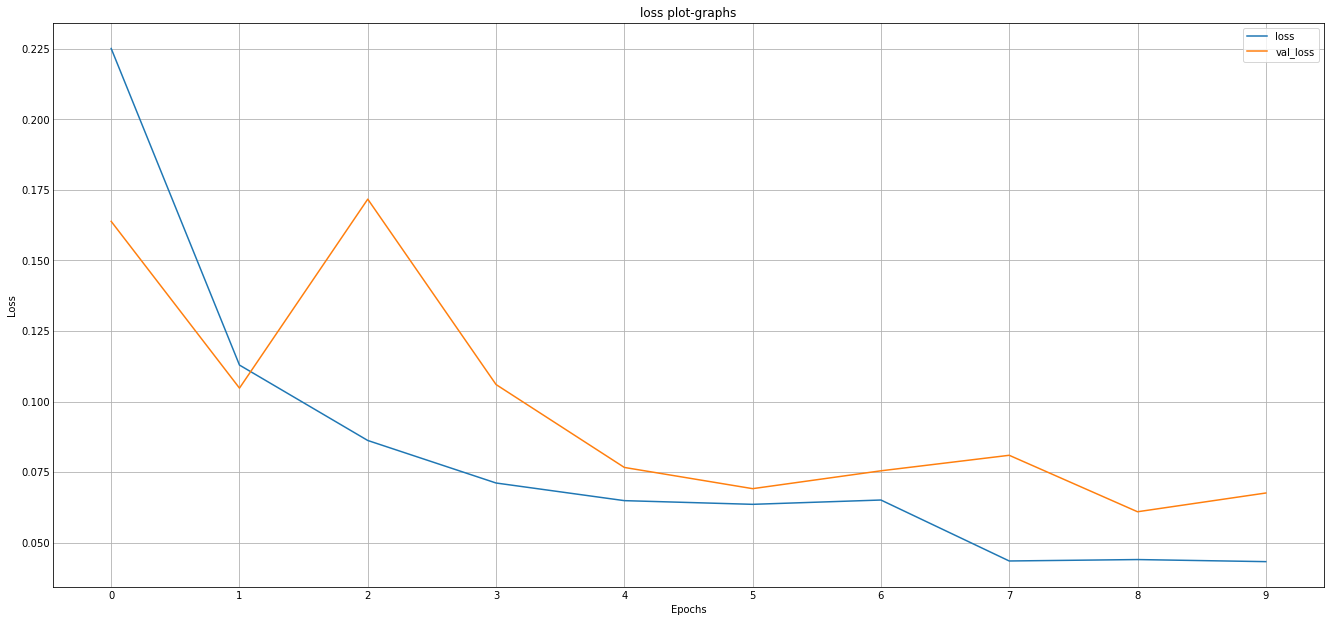

In [14]:
with plt.style.context(style='_mpl-gallery'):
    plt.figure(figsize=(18,8))
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.title(label="accuracy plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy')
    plt.xticks(range(0,10))
    plt.legend()
    plt.show()

    plt.figure(figsize=(18,8))
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.title(label="loss plot-graphs")
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss')
    plt.xticks(range(0,10))
    plt.legend()
    plt.show()

In [15]:
prediction=model.predict(x_test,batch_size=32,verbose=1)
print(prediction)

157/157 [==============================] - 9s 31ms/step
[[4.4063063e-04 1.5182595e-08 9.9948931e-01 1.6504717e-07 6.9841895e-05]
 [8.1078897e-06 5.9432115e-10 4.2306946e-13 9.9999189e-01 2.9064797e-17]
 [1.2852891e-07 2.2795410e-18 5.2185980e-05 2.4076905e-13 9.9994767e-01]
 ...
 [3.3123574e-01 4.3019681e-04 2.9258556e-06 6.6832793e-01 3.2120083e-06]
 [6.8196462e-11 1.0000000e+00 3.0987246e-12 2.8986186e-14 3.6645602e-18]
 [5.4802302e-07 1.3127598e-15 4.4708272e-06 2.0121840e-09 9.9999499e-01]]


In [16]:
pred=[]
for i in range(len(prediction)):
    pred.append(np.argmax(prediction[i]))
print(pred)

[2, 3, 4, 3, 1, 2, 2, 1, 1, 4, 2, 1, 3, 1, 3, 4, 0, 4, 1, 1, 3, 3, 0, 1, 4, 4, 0, 0, 3, 3, 1, 1, 2, 3, 2, 0, 2, 3, 4, 0, 1, 4, 4, 1, 0, 4, 1, 3, 2, 1, 1, 4, 0, 4, 0, 1, 4, 1, 2, 3, 1, 2, 0, 2, 2, 4, 0, 4, 2, 4, 4, 2, 1, 0, 3, 4, 2, 0, 3, 4, 3, 2, 3, 3, 2, 2, 1, 4, 4, 2, 3, 4, 4, 2, 2, 1, 1, 4, 0, 4, 2, 4, 4, 2, 2, 3, 4, 4, 1, 2, 3, 4, 0, 1, 2, 0, 3, 4, 2, 2, 4, 3, 4, 2, 1, 4, 3, 0, 0, 3, 3, 2, 2, 3, 2, 4, 0, 0, 1, 4, 3, 1, 4, 0, 4, 1, 2, 1, 1, 4, 4, 4, 4, 3, 2, 0, 3, 0, 2, 4, 1, 4, 1, 2, 2, 2, 3, 1, 3, 0, 0, 1, 4, 0, 4, 2, 1, 2, 1, 4, 3, 2, 4, 3, 0, 1, 1, 4, 0, 3, 3, 4, 0, 2, 1, 1, 3, 4, 1, 0, 2, 3, 2, 1, 2, 2, 1, 0, 1, 3, 3, 0, 0, 3, 4, 3, 4, 3, 3, 1, 4, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 2, 2, 2, 1, 4, 1, 4, 1, 2, 1, 1, 3, 1, 2, 1, 2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 4, 0, 0, 4, 1, 0, 0, 2, 1, 1, 0, 4, 3, 2, 3, 4, 1, 1, 3, 3, 1, 1, 3, 1, 0, 1, 3, 0, 3, 4, 4, 4, 3, 0, 3, 1, 2, 3, 2, 4, 0, 3, 0, 0, 4, 4, 1, 0, 2, 1, 3, 4, 1, 2, 0, 0, 

In [17]:
y_true=[]
for i in range(len(y_test)):
    y_true.append(np.argmax(y_test[i]))
print(y_true)

[2, 3, 4, 3, 1, 2, 2, 1, 1, 4, 2, 1, 3, 1, 3, 4, 0, 4, 1, 1, 3, 3, 0, 1, 4, 4, 0, 0, 3, 3, 1, 1, 2, 3, 2, 0, 2, 3, 4, 0, 1, 4, 4, 1, 4, 4, 1, 3, 2, 1, 1, 4, 0, 4, 0, 1, 4, 1, 2, 3, 1, 2, 0, 4, 2, 4, 0, 4, 2, 4, 4, 2, 1, 0, 3, 4, 2, 0, 3, 4, 3, 2, 3, 3, 2, 2, 1, 4, 4, 2, 3, 4, 4, 2, 2, 1, 1, 4, 0, 4, 2, 4, 4, 2, 2, 3, 4, 4, 1, 2, 3, 4, 0, 1, 2, 0, 3, 4, 2, 2, 4, 3, 4, 2, 1, 4, 3, 0, 0, 3, 3, 2, 2, 3, 2, 4, 0, 0, 1, 4, 3, 1, 4, 0, 4, 1, 2, 1, 1, 4, 4, 4, 4, 3, 2, 0, 3, 0, 2, 4, 1, 4, 1, 4, 2, 2, 3, 1, 3, 0, 0, 1, 4, 0, 4, 2, 1, 2, 1, 4, 3, 2, 4, 3, 0, 1, 1, 4, 0, 3, 3, 4, 0, 2, 1, 1, 3, 4, 1, 0, 2, 3, 2, 1, 2, 2, 1, 0, 1, 3, 3, 0, 0, 3, 4, 3, 4, 3, 3, 1, 4, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 2, 2, 2, 1, 4, 1, 4, 1, 2, 1, 1, 3, 1, 2, 1, 2, 0, 2, 3, 3, 3, 0, 0, 3, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 4, 0, 0, 4, 1, 0, 0, 2, 1, 1, 2, 4, 3, 2, 3, 4, 1, 1, 3, 3, 1, 1, 3, 1, 0, 1, 3, 0, 3, 4, 4, 4, 3, 0, 3, 1, 2, 3, 2, 4, 0, 3, 0, 0, 4, 4, 1, 0, 2, 1, 3, 4, 1, 2, 0, 0, 

### Result analysis

In [18]:
class_labels=['normal', 'dos', 'r2l', 'probe', 'u2r']

<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Accuracy Score</h6>

In [19]:
model_accuracy=accuracy_score(y_true=y_true,y_pred=pred)
print("ConvolutionalLongShortTermMemory model's Validation accuracy is {:.2f}%".format(model_accuracy*100))

ConvolutionalLongShortTermMemory model's Validation accuracy is 97.58%


<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Classification Report</h6>

In [20]:
print(classification_report(y_true=y_true,y_pred=pred, target_names=class_labels))

              precision    recall  f1-score   support

      normal       0.97      0.96      0.97      1000
         dos       1.00      1.00      1.00      1000
         r2l       0.94      0.98      0.96      1000
       probe       0.99      1.00      1.00      1000
         u2r       0.98      0.94      0.96      1000

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000



<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Confusion Matrix</h6>

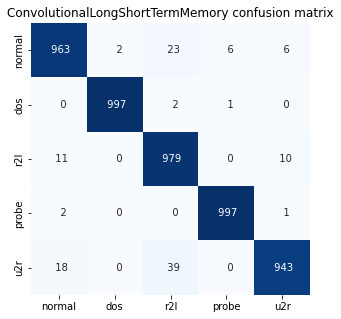

In [21]:
plt.figure(figsize=(5,5))
ax=sns.heatmap(data=confusion_matrix(y_true=y_true,y_pred=pred),
              annot=True,
              fmt='4d',
              cbar=False,
              cmap=plt.cm.Blues,
              xticklabels=class_labels,
              yticklabels=class_labels)
plt.title(label="ConvolutionalLongShortTermMemory confusion matrix")
plt.show()

<h6 style="font-family:san-serif;font-size:20px;color:black;font-weight:bold;text-align:left">Model Saving</h6>

In [22]:
model.save("models/ConvolutionalLongShortTermMemory_model.h5")

---